## Objectiv: To classify the hand wriiten digits by applying ANN on MNIST image dataset

#### importing libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import clear_output
import random as r

### Reading the dataset
### You can download the dataset from the given link into your working folder. https://www.kaggle.com/ngbolin/mnist-dataset-digit-recognizer/data

In [5]:
dataset= pd.DataFrame(pd.read_csv("datasets/mnist_train.csv"))

### Looking into the data

In [88]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## plotting the image 
#### Steps to plot the image:
1. taking out any row out of the dataset
2. removing it's label column
3. convert it into numpy array
4. reshaping it from (1,784) vector to a (28,28) matrix
5. plot it using plt.imshow() function


LABEL OF IMAGE IS:  6


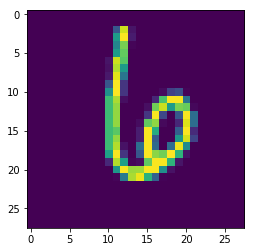

In [90]:
image_num=788
plt.imshow(np.array(dataset.iloc[image_num,1:]).reshape(28,28))
print("LABEL OF IMAGE IS: ",dataset.iloc[image_num,0])

## SEPARATING THE TARGET VARIABL AND PIXEL VARIABLE

In [91]:
x=dataset.drop('label',axis=1).copy()
y = dataset['label']

In [92]:
len(y.unique())

10

## one hot encoding of the label

In [78]:
y = np.eye(len(y.unique()))[y]

In [79]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## splitting the dataset into training and testing

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [81]:
x_train.shape

(33600, 784)

## .........CREATING TENSORFLOW ARCHITECTURE

## CREATING PLACEHOLDEER 

In [101]:
num_of_col_in_x=x_train.shape[1]

num_of_col_in_y=y_train.shape[1]

x_placeholder=tf.placeholder(dtype=tf.float64,shape=(None,num_of_col_in_x),name="x_placeholder")
y_placeholder=tf.placeholder(dtype=tf.float64,shape=(None,num_of_col_in_y),name="y_placeholder")

# we are putting None in place of number of rows, so that we can control it with with batch size later

In [102]:
print("x_placeholder : ",x_placeholder)
print("y_placeholder : ",y_placeholder)

x_placeholder :  Tensor("x_placeholder_1:0", shape=(?, 784), dtype=float64)
y_placeholder :  Tensor("y_placeholder_1:0", shape=(?, 10), dtype=float64)


In [103]:
Init=tf.global_variables_initializer()

In [104]:
Init

<tf.Operation 'init' type=NoOp>